# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

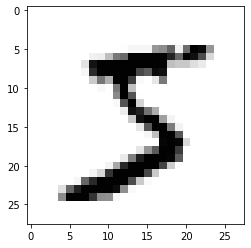

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [8]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [9]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [10]:
model = keras.models.Sequential()

# reshape(-1, 28*28)
model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(keras.layers.Dense(units=300, activation='relu'))

model.add(keras.layers.Dense(units=100, activation='relu'))

model.add(keras.layers.Dense(units=10, activation='softmax'))

In [11]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=100, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [12]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [13]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

Establecemos la configuración de ejecución... el compile.

In [14]:
model.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics= [keras.metrics.SparseCategoricalAccuracy()]
)

In [15]:
# Equivalente
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [17]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val)
)


Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 1.3625 - accuracy: 0.6366 - val_loss: 0.3940 - val_accuracy: 0.8974
Epoch 2/15
782/782 [==============================] - 2s 2ms/step - loss: 0.3960 - accuracy: 0.8912 - val_loss: 0.3008 - val_accuracy: 0.9153
Epoch 3/15
782/782 [==============================] - 2s 2ms/step - loss: 0.3169 - accuracy: 0.9104 - val_loss: 0.2631 - val_accuracy: 0.9276
Epoch 4/15
782/782 [==============================] - 2s 2ms/step - loss: 0.2794 - accuracy: 0.9195 - val_loss: 0.2495 - val_accuracy: 0.9291
Epoch 5/15
782/782 [==============================] - 2s 2ms/step - loss: 0.2557 - accuracy: 0.9267 - val_loss: 0.2213 - val_accuracy: 0.9369
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 0.2282 - accuracy: 0.9346 - val_loss: 0.2052 - val_accuracy: 0.9430
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 0.2156 - accuracy: 0.9390 - val_loss: 0.1917 - val_accuracy: 0.9455
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [18]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val)
)

Epoch 1/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1269 - accuracy: 0.9639 - val_loss: 0.1330 - val_accuracy: 0.9637
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.1210 - accuracy: 0.9661 - val_loss: 0.1286 - val_accuracy: 0.9649
Epoch 3/15
782/782 [==============================] - 2s 2ms/step - loss: 0.1156 - accuracy: 0.9672 - val_loss: 0.1258 - val_accuracy: 0.9667
Epoch 4/15
782/782 [==============================] - 2s 2ms/step - loss: 0.1106 - accuracy: 0.9688 - val_loss: 0.1214 - val_accuracy: 0.9670
Epoch 5/15
782/782 [==============================] - 2s 2ms/step - loss: 0.1058 - accuracy: 0.9701 - val_loss: 0.1187 - val_accuracy: 0.9670
Epoch 6/15
782/782 [==============================] - 2s 2ms/step - loss: 0.1015 - accuracy: 0.9713 - val_loss: 0.1178 - val_accuracy: 0.9679
Epoch 7/15
782/782 [==============================] - 2s 2ms/step - loss: 0.0976 - accuracy: 0.9727 - val_loss: 0.1158 - val_accuracy: 0.9693
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [19]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.8708168864250183,
  0.37214651703834534,
  0.30781206488609314,
  0.2733110785484314,
  0.24818062782287598,
  0.22810126841068268,
  0.21208898723125458,
  0.1977347880601883,
  0.18537403643131256,
  0.1742042899131775,
  0.1644800752401352,
  0.15524445474147797,
  0.14734597504138947,
  0.13984641432762146,
  0.1331223100423813],
 'accuracy': [0.7834200263023376,
  0.897159993648529,
  0.912339985370636,
  0.9215400218963623,
  0.9289600253105164,
  0.9342600107192993,
  0.9401199817657471,
  0.9435999989509583,
  0.9467800259590149,
  0.9503800272941589,
  0.9533399939537048,
  0.9562399983406067,
  0.958620011806488,
  0.9606599807739258,
  0.9626200199127197],
 'val_loss': [0.3939584195613861,
  0.30083853006362915,
  0.2630949318408966,
  0.24948103725910187,
  0.2213282287120819,
  0.2052135020494461,
  0.1917153149843216,
  0.1820603460073471,
  0.1735927313566208,
  0.16407239437103271,
  0.157254159450531,
  0.15155892074108124,
  0.1464010328054428,
  0.1416133

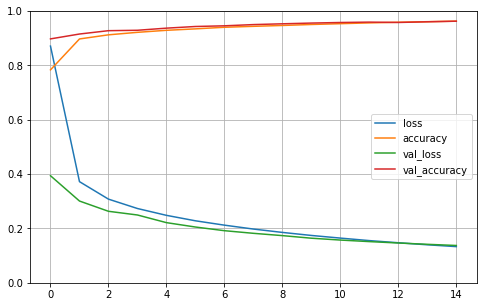

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [21]:
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

313/313 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9703
test loss, test acc: [0.09834390878677368, 0.970300018787384]


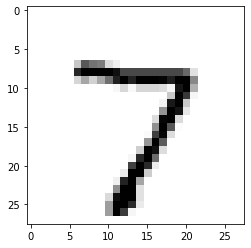

In [22]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [24]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

(1, 10)


array([[0.   , 0.   , 0.001, 0.002, 0.   , 0.   , 0.   , 0.997, 0.   ,
        0.   ]], dtype=float32)

In [26]:
predictions.max()

0.997

In [27]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [28]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [29]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(input_shape = X_train.shape[1:],
                      units = 30,
                      activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error",
             optimizer = "sgd")
history = model.fit(X_train,
         y_train,
         epochs=100,
         validation_data = (X_valid, y_valid))

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.5324 - val_loss: 0.5678
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7186 - val_loss: 0.4759
Epoch 3/100
363/363 [==============================] - 0s 873us/step - loss: 0.4763 - val_loss: 0.4585
Epoch 4/100
363/363 [==============================] - 0s 851us/step - loss: 0.4670 - val_loss: 0.4339
Epoch 5/100
363/363 [==============================] - 0s 843us/step - loss: 0.4270 - val_loss: 0.4215
Epoch 6/100
363/363 [==============================] - 0s 854us/step - loss: 0.4174 - val_loss: 0.4171
Epoch 7/100
363/363 [==============================] - 0s 846us/step - loss: 0.4241 - val_loss: 0.4122
Epoch 8/100
363/363 [==============================] - 0s 854us/step - loss: 0.4002 - val_loss: 0.4038
Epoch 9/100
363/363 [==============================] - 0s 901us/step - loss: 0.4053 - val_loss: 0.4020
Epoch 10/100
363/363 [==============================] - 0s 827us/step - loss:

In [38]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

model.predict(X_test[:3])

162/162 [==============================] - 0s 700us/step - loss: 0.3395
0.339517742395401


array([[2.4672513],
       [1.6726829],
       [1.9536378]], dtype=float32)

In [39]:
y_test[:3]

array([3.154, 2.554, 1.566])

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [40]:
model.save('my_keras_model.h5')

In [41]:
# Lo volvemos a cargar
model = keras.models.load_model('my_keras_model.h5')

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('callback_model.h5')

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    callbacks=[checkpoint_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 648us/step - loss: 0.3136
Epoch 2/20
363/363 [==============================] - 0s 623us/step - loss: 0.3104
Epoch 3/20
363/363 [==============================] - 0s 563us/step - loss: 0.3107
Epoch 4/20
363/363 [==============================] - 0s 643us/step - loss: 0.3100
Epoch 5/20
363/363 [==============================] - 0s 589us/step - loss: 0.3097
Epoch 6/20
363/363 [==============================] - 0s 611us/step - loss: 0.3087
Epoch 7/20
363/363 [==============================] - 0s 575us/step - loss: 0.3101
Epoch 8/20
363/363 [==============================] - 0s 554us/step - loss: 0.3085
Epoch 9/20
363/363 [==============================] - 0s 580us/step - loss: 0.3096
Epoch 10/20
363/363 [==============================] - 0s 661us/step - loss: 0.3088
Epoch 11/20
363/363 [==============================] - 0s 733us/step - loss: 0.3078
Epoch 12/20
363/363 [==============================] - 0s 601us/step - loss: 0.3077
E

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [45]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopping_cb],
    validation_data=(X_valid, y_valid)
)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.2959 - val_loss: 0.3135
Epoch 2/100
363/363 [==============================] - 0s 994us/step - loss: 0.2972 - val_loss: 0.3130
Epoch 3/100
363/363 [==============================] - 0s 980us/step - loss: 0.2958 - val_loss: 0.3184
Epoch 4/100
363/363 [==============================] - 0s 944us/step - loss: 0.2960 - val_loss: 0.3101
Epoch 5/100
363/363 [==============================] - 0s 942us/step - loss: 0.2958 - val_loss: 0.3164
Epoch 6/100
363/363 [==============================] - 0s 964us/step - loss: 0.2961 - val_loss: 0.3224
Epoch 7/100
363/363 [==============================] - 0s 938us/step - loss: 0.2954 - val_loss: 0.3103
Epoch 8/100
363/363 [==============================] - 0s 921us/step - loss: 0.2960 - val_loss: 0.3232
Epoch 9/100
363/363 [==============================] - 0s 909us/step - loss: 0.2953 - val_loss: 0.3141


### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [46]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [47]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 [==============================] - 1s 4ms/step - loss: 0.2959 - val_loss: 0.3118
Epoch 2/50
363/363 [==============================] - 0s 914us/step - loss: 0.2972 - val_loss: 0.3072
Epoch 3/50
363/363 [==============================] - 0s 936us/step - loss: 0.2959 - val_loss: 0.3116
Epoch 4/50
363/363 [==============================] - 0s 950us/step - loss: 0.2944 - val_loss: 0.3158
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3031 - val_loss: 0.3058
Epoch 6/50
363/363 [==============================] - 0s 959us/step - loss: 0.2984 - val_loss: 0.3041
Epoch 7/50
363/363 [==============================] - 0s 993us/step - loss: 0.2977 - val_loss: 0.3044
Epoch 8/50
363/363 [==============================] - 0s 936us/step - loss: 0.2980 - val_loss: 0.3063
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.2980 - val_loss: 0.3131
Epoch 10/50
363/363 [==============================] - 0s 890us/step - loss: 0.2959 - va

In [ ]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''